### Analyzing the Stroop Effect
Perform the analysis in the space below. Remember to follow [the instructions](https://docs.google.com/document/d/1-OkpZLjG_kX9J6LIQ5IltsqMzVWjh36QpnP2RYpVdPU/pub?embedded=True) and review the [project rubric](https://review.udacity.com/#!/rubrics/71/view) before submitting. Once you've completed the analysis and write up, download this file as a PDF or HTML file and submit in the next section.


(1) What is the independent variable? What is the dependent variable?

Independent variable is word status, that is if word is Congruent or Incongruent.
Dependent variable is response time.

(2) What is an appropriate set of hypotheses for this task? What kind of statistical test do you expect to perform? Justify your choices.

Ho - Null Hypothesis is that there is no significant difference in the average response time of population in reading the congruent words as compared to viewing the incongruent words.
i.e. μd=0

Ha - Alternative Hypothesis is that the population average response times for congruent words as compared to viewing the incongruent words is significantly different.
i.e. μd>0 or μd<0

where
μd- Difference between the two tests

For this Statistical analysis I plan to perform two tailed dependent t-Tests. The following are the reasons for selecting it:
1.Population standard deviation is unknown
2.Each participant performs both the tests, so gain some experience reading the words. This would impact their performance in the second test. So I believe both the tests are related to each other, that is they are dependent.
3.The tests are performed on same subjects.

(3) Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability. The name of the data file is 'stroopdata.csv'.

In [40]:
# Descriptive statistic analysis 
import os
import pandas as pd
import matplotlib.pyplot as plt

path = os.getcwd()
#Read data file
data = pd.read_csv(path + '/stroopdata.csv')

data.describe(include = 'all')

,Congruent,Incongruent
count,24.000000,24.000000
mean,14.051125,22.015917
std,3.559358,4.797057
min,8.630000,15.687000
25%,11.895250,18.716750
50%,14.356500,21.017500
75%,16.200750,24.051500
max,22.328000,35.255000


Mean represents the central tendency and Standard deviation is one measure of variability.
Mean:
Congruent	= 14.051125
Incongruent =22.015917
Standard Deviation
Congruent	= 3.559358
Incongruent = 4.797057

(4) Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

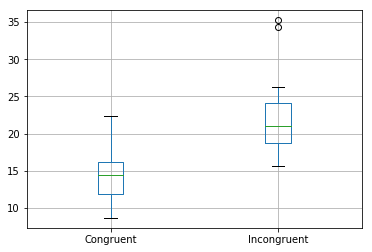

In [41]:
#Boxplot
data.boxplot()

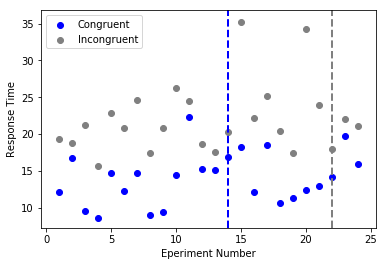

In [42]:
data['Serial Number']=data.index+1
congruent = data['Congruent']
incongruent = data['Incongruent']
sn=data['Serial Number']
plt.scatter(data['Serial Number'], congruent,  color='blue')
plt.scatter(data['Serial Number'], incongruent, color='grey')
plt.axvline(congruent.mean(), color='blue', linestyle='dashed', linewidth=2)
plt.axvline(incongruent.mean(), color='grey', linestyle='dashed', linewidth=2)

plt.ylabel('Response Time')
plt.xlabel('Eperiment Number')
plt.legend()

Observations from above charts are:
Mean response time do not match for congruent and incongruent.
It can be seen that the Mean response time for congruent words (around 14 seconds) is lower than that of incongruent word(around 22 seconds) .
There are outliers in incongruent data with response time around 34.
The same can also be observed from the scatter plot.

(5) Now, perform the statistical test and report the results. What is the confidence level and your critical statistic value? Do you reject the null hypothesis or fail to reject it? Come to a conclusion in terms of the experiment task. Did the results match up with your expectations?

In [43]:
# Perform the statistical test here
t = scipy.stats.ttest_rel(incongruent, congruent)
print (t)

Ttest_relResult(statistic=8.020706944109957, pvalue=4.1030005857111781e-08)


Degree of freedom is :n=24-1=23
For significance level α=0.05 and n=23 the t critical value from t-table is 2.069. Since we are doing two tailed test
T-Critical value = (+/-) 2.069
From the t test result we get 
T-stat = 8.020706944109957
Observation:
    T-stat > T-Critical 
    
Thus, the null hypothesis which states that there is no significant difference in the average response time of population in reading the congruent words as compared to viewing the incongruent words i.e. μd=0 is rejected.
As the t-stat value lies in the t-critical region i.e. the right critical region, it shows that the time difference for the two types of tests is significantly statistally different.This is as per my expectation  and observation from initial visualization.


Refrences:
https://en.wikipedia.org/wiki/Student%27s_t-test#Dependent_t-test
http://www.statisticshowto.com/what-is-an-alpha-level/
https://matplotlib.org/api/pyplot_api.html    
https://community.modeanalytics.com/python/tutorial/python-histograms-boxplots-and-distributions/
http://www.statstutor.ac.uk/resources/uploaded/tutorsquickguidetostatistics.pdf
https://s3.amazonaws.com/udacity-hosted-downloads/t-table.jpg
https://data-lessons.github.io/library-python/06a-plotting-with-pandas/
http://www.sjsu.edu/faculty/gerstman/StatPrimer/t-table.pdf